# Models training 
This notebook is used to train test and save models that are defined in the `autoencoders.py` file. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%load_ext autoreload
%autoreload 2
plt.style.use('ggplot')
import sys 
import os
sys.path.append('/'.join(os.getcwd().split('/')[:4]))
from config.get import cfg
from tensorflow import keras
from tensorflow.keras import layers
import autoencoders

2022-01-10 18:24:02.298651: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-10 18:24:02.298685: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Loading data

In [3]:
X_train = np.load(cfg['files']["liquid"]["scaled_ae_train_features"])
X_test  = np.load(cfg['files']["liquid"]["raw_test_features"])
print(f"shapes : X_train={X_train.shape},X_test={X_test.shape}")

shapes : X_train=(5292, 3, 600, 2),X_test=(1323, 3, 600, 2)


# Loading model
Loading a model defined in `autoencoders.py`

In [6]:
model_name,autoencoder = autoencoders.fully_connected_3L()
autoencoder.summary()
train_loss = []
test_loss = []

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3, 600, 2)]       0         
                                                                 
 reshape (Reshape)           (None, 3600)              0         
                                                                 
 dense_4 (Dense)             (None, 600)               2160600   
                                                                 
 dense_5 (Dense)             (None, 100)               60100     
                                                                 
 dense_6 (Dense)             (None, 600)               60600     
                                                                 
 dense_7 (Dense)             (None, 3600)              2163600   
                                                                 
 reshape_1 (Reshape)         (None, 3, 600, 2)         0   

# Training the model

In [7]:
hist = autoencoder.fit(X_train, X_train,epochs=70,validation_data=(X_test, X_test))

# save losses
train_loss += hist.history["loss"]
test_loss  += hist.history["val_loss"]

Epoch 1/70
166/166 [==============================] - 19s 114ms/step - loss: 0.2398 - val_loss: 0.1444
Epoch 2/70
166/166 [==============================] - 19s 113ms/step - loss: 0.1335 - val_loss: 0.1189
Epoch 3/70
166/166 [==============================] - 19s 115ms/step - loss: 0.1257 - val_loss: 0.1116
Epoch 4/70
166/166 [==============================] - 19s 114ms/step - loss: 0.1084 - val_loss: 0.1028
Epoch 5/70
166/166 [==============================] - 19s 115ms/step - loss: 0.1005 - val_loss: 0.0966
Epoch 6/70
166/166 [==============================] - 19s 114ms/step - loss: 0.0971 - val_loss: 0.0955
Epoch 7/70
166/166 [==============================] - 19s 114ms/step - loss: 0.0907 - val_loss: 0.0916
Epoch 8/70
166/166 [==============================] - 19s 114ms/step - loss: 0.0898 - val_loss: 0.0867
Epoch 9/70
166/166 [==============================] - 19s 115ms/step - loss: 0.0880 - val_loss: 0.1054
Epoch 10/70
166/166 [==============================] - 20s 121ms/step - l

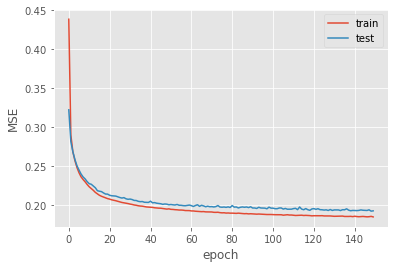

In [39]:
plt.plot(train_loss,label="train")
plt.plot(test_loss,label="test")
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

# Saving 
We save the trained model and the recorded losses

In [40]:
autoencoder.save(cfg["models"]["autoencoder"] + f"{model_name}")
np.save(file = cfg["models"]["autoencoder"]+ f"{model_name}_train_loss", arr = np.array(train_loss))
np.save(file = cfg["models"]["autoencoder"]+ f"{model_name}_test_loss", arr = np.array(test_loss))